При помощи следующей программы: получить получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y



In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

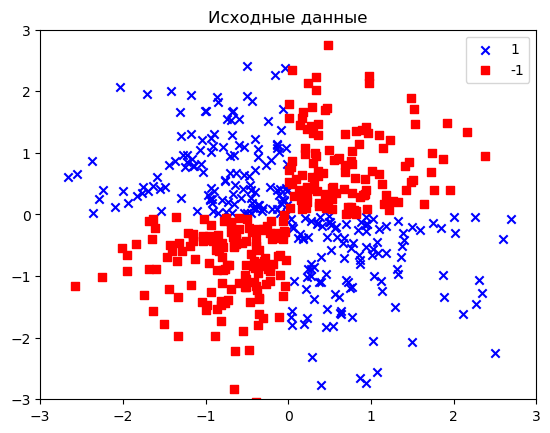

In [6]:
np.random.seed(0)
x = np.random.randn(512, 2)
y = np.logical_xor(x[:,0] > 0, x[:,1] > 0)
y = np .where (y, 1, -1)
plt.figure(1)
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='b', marker='x', label='1')
plt.scatter(x[y == -1, 0], x[y == -1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0, 3.0); plt.xlim(-3.0, 3.0)
plt.legend()
plt.title("Исходные данные")
plt.show()

Задание 2. Создать и обучить модель классификации на основе логистической регрессии, использующию полиномную комбинацию признаков на входе. выбрать оптимальные гиперпараметры модели.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [14]:
def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LogisticRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'logisticregression__C': np.logspace(-2, 2, num=8)}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid,
                         cv=10,
                         scoring='neg_mean_squared_error')

poly_grid.fit(x_train, y_train)

best_params_LR = poly_grid.best_params_
print('\n best_params=', best_params_LR)


 best_params= {'logisticregression__C': 100.0, 'polynomialfeatures__degree': 2}


In [15]:
np.logspace(-2, 2, num=8)

array([1.00000000e-02, 3.72759372e-02, 1.38949549e-01, 5.17947468e-01,
       1.93069773e+00, 7.19685673e+00, 2.68269580e+01, 1.00000000e+02])

In [16]:
best_params = poly_grid.best_params_
print('\n best_params=', best_params)


 best_params= {'logisticregression__C': 100.0, 'polynomialfeatures__degree': 2}


Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных, вероятность принадлежности первого образца к различным классам.

In [17]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != poly_grid.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != poly_grid.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.002793296089385475
Удельное количество ошибок на тестовом наборе: 0.006493506493506494


In [18]:
poly_grid.best_estimator_.predict_proba(x_train[[0]])

array([[0.998434, 0.001566]])